<h1><center> EXPL Project2 Diabets / Riding a Bicycle </center></h1>
<h1><center>Project2-1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!</center></h1>

**Content**<br>
(1) 데이터 가져오기<br>
(2) 모델에 입력할 데이터 X 준비하기<br>
(3) 모델에 예측할 데이터 y 준비하기<br>
(4) train 데이터와 test 데이터로 분리하기<br>
(5) 모델 준비하기<br>
(6) 손실함수 loss 정의하기<br>
(7) 기울기를 구하는 gradient 함수 구현하기<br>
(8) 하이퍼 파라미터인 학습률 설정하기<br>
(9) 모델 학습하기<br>
(10) test 데이터에 대한 성능 확인하기<br>
(11) 정답 데이터와 예측한 데이터 시각화하기<br>

- Data Information: [당뇨병 환자 데이터와 다중 선형회귀](https://yhyun225.tistory.com/11)

In [356]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [357]:
diabetes = load_diabetes()
arr_X = diabetes.data 
arr_y = diabetes.target
df_diabetes = pd.DataFrame(np.concatenate((arr_X, arr_y.reshape(442,1)), axis = 1), columns = diabetes.feature_names + ['target'])
print(arr_X, arr_y)
df_diabetes.head()

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]       y_test      y_pred
0      127.0  239.509380
1       13.0   45.974996
2      163.0  207.430683
3      233.0  289.785397
4      222.0  378.499897
...      ...         ...
2173   351.0  223.510688
2174     2.0   70.302221
2175   509.0  305.491478
2176     5.0   39.426977
2177   239.0  241.890892

[2178 rows x 2 columns]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


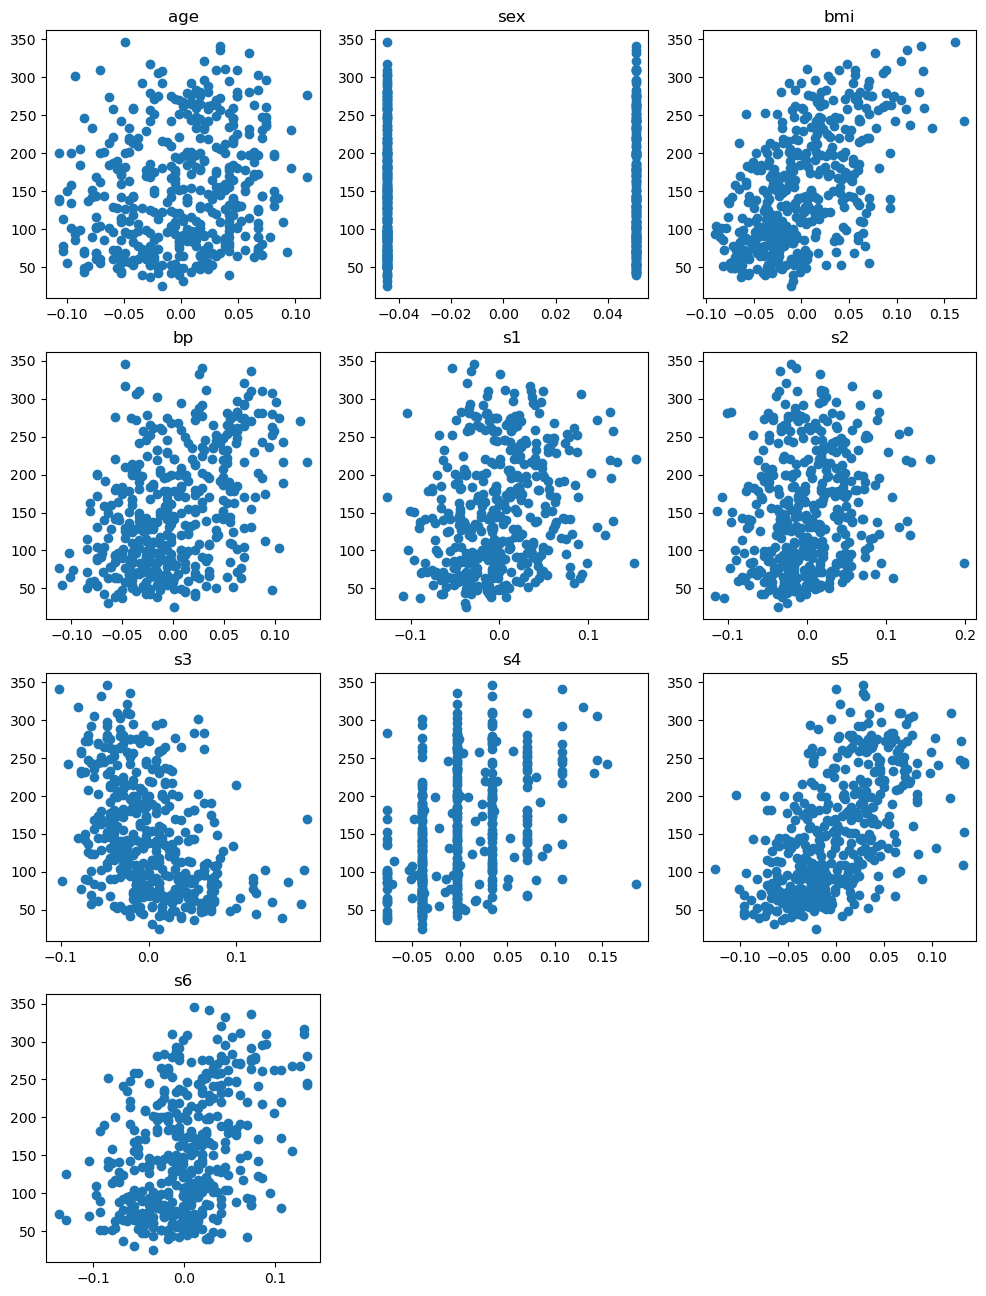

In [358]:
plt.figure(figsize = (12,16))
for i in range(arr_X.shape[1]):
    plt.subplot(4,3,i+1).scatter(arr_X[:,i], arr_y)
    plt.title(diabetes.feature_names[i])

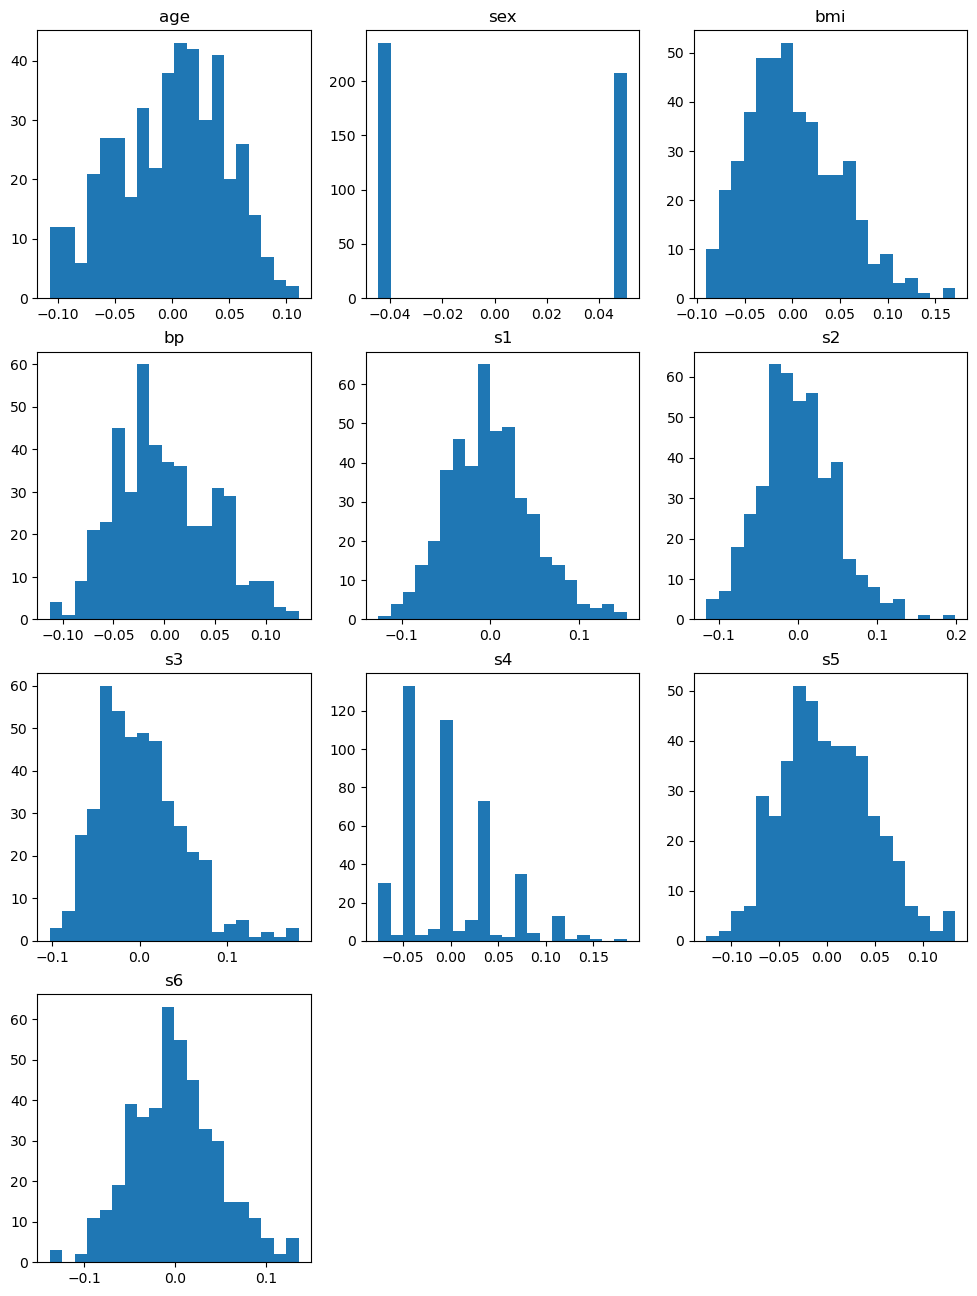

In [359]:
plt.figure(figsize = (12,16))
for i in range(arr_X.shape[1]):
    plt.subplot(4,3,i+1).hist(arr_X[:,i], bins = 20)
    plt.title(diabetes.feature_names[i])

- scatterplot과 histogram으로 살펴본 결과 다음과 같은 사항을 확인할 수 있음
- sex값은 두 가지 값으로 0, 1 이 아닌 다소 이상한 값으로 저장되어 있음.
- s4값은 구간에 따라 한 값으로 치우쳐져 있는 분포가 눈에 띔

## 모델에 입력할 데이터 X 준비하기

In [367]:
print(type(arr_X), arr_X.shape)

<class 'numpy.ndarray'> (442, 10)


## 모델에 예측할 데이터 y 준비하기

In [368]:
print(type(arr_y), arr_y.shape)

<class 'numpy.ndarray'> (442,)


## train 데이터와 test 데이터로 분리하기

In [369]:
X_train, X_test, y_train, y_test = train_test_split(arr_X, arr_y, test_size= .2, random_state=42)

## 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [370]:
W = np.random.uniform(0,100,X_train.shape[1])
b = np.random.randint(0,100)
W, b

(array([49.98152726, 78.9538972 , 10.41114591, 61.34945384, 24.00323747,
        22.66878017,  5.85279153, 42.13794528, 17.51597175, 88.70587241]),
 26)

In [371]:
def model(X,W,b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:,i] * W[i]
    predictions += b  
    return predictions

## 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [372]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X,W,b,y):
    y_pred = model(X,W,b)
    loss = MSE(y, y_pred)
    return loss

In [374]:
loss(arr_X, W, b, arr_y)

21138.468073515363

## 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [375]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [376]:
LEARNING_RATE = 0.1

## 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [377]:
# sex 지우기
# X_train = np.delete(X_train, 1, axis=1)
# X_train.shape
y_train.shape, X_train.shape
X_train[1]

array([-0.00914709,  0.05068012, -0.01806189, -0.03321323, -0.0208323 ,
        0.01215151, -0.07285395,  0.07120998,  0.00027248,  0.01963284])

In [378]:
# W, b값 재설정
W = np.random.rand(X_train.shape[1])
b = np.random.rand()
W, b

(array([0.81113299, 0.85232677, 0.96191823, 0.61516797, 0.31050847,
        0.49006041, 0.4227916 , 0.38574746, 0.40019886, 0.91494606]),
 0.5550312588615145)

In [379]:
losses = []
for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3443.1654
Iteration 2000 : Loss 3094.0991
Iteration 3000 : Loss 2979.0498
Iteration 4000 : Loss 2933.7533
Iteration 5000 : Loss 2914.7048


(0.0, 50.0)

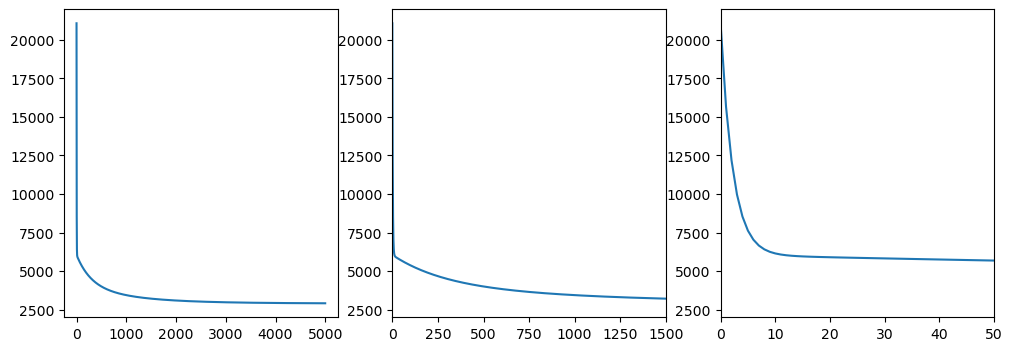

In [380]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1).plot(losses)
plt.subplot(1,3,2).plot(losses)
plt.xlim(0,1500)
plt.subplot(1,3,3).plot(losses)
plt.xlim(0,50)

- iteration 5~15번 사이에 loss 감소율에 급격한 변화가 있음. 1000 이후로는 큰 변화가 없음

##  test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

In [382]:
print(W, b)
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
rmse = mse**0.5

[  41.87641865 -203.20769235  509.60234269  324.9999209   -70.92128084
 -119.23139191 -216.12144284  144.43631206  376.40297399  112.04963556] 151.37271336013706
mse:  2866.9807217480165 rmse:  53.54419409934206


In [406]:
print("MSE: ", mse, "RMSE: ", rmse)

MSE:  2866.9807217480165 RMSE:  53.54419409934206


## 정답 데이터와 예측한 데이터 시각화하기

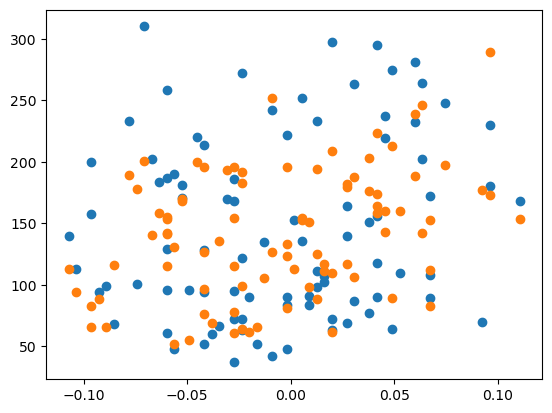

In [384]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

- 분포가 비슷하게 나온 것으로 보임

# <center>Project 2-2 <br> 날씨좋은 월요일 오후 세 시, 자전거를 타는 사람은 몇 명?</center>

**Content**

Project 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?<br>
(1) 데이터 가져오기<br>
(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기<br>
(3) year, month, day, hour, minute, second 데이터 개수 시각화하기<br>
(4) X, y 컬럼 선택 및 train/test 데이터 분리<br>
(5) LinearRegression 모델 학습<br>
(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산<br>
(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기<br>

- kaggle 경진대회 데이터
- 이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.

# module import하기

In [385]:
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 가져오기

- [여기](https://www.kaggle.com/c/bike-sharing-demand/data)에서 데이터를 상세히 확인할 수 있습니다.
- train.csv 데이터를 train 변수로 가져 옵니다

In [386]:
# /Users/louan/Documents/projects/Aiffel/lms/projects/data
data_dir = os.getenv('HOME') + '/Documents/projects/Aiffel/lms/projects/data'
data_path_train = os.path.join(data_dir, 'train.csv')
train = pd.read_csv(data_path_train)

## datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

- to_datetime 활용 : [링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) 참조

In [387]:
print(train.columns)
train.info()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [388]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [389]:
# extract year, month from datetime series
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['min'] = pd.DatetimeIndex(train['datetime']).minute
train['sec'] = pd.DatetimeIndex(train['datetime']).second

## year, month, day, hour, minute, second 데이터 개수 시각화하기

In [390]:
train.iloc[:,-6:].head()

,year,month,day,hour,min,sec
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


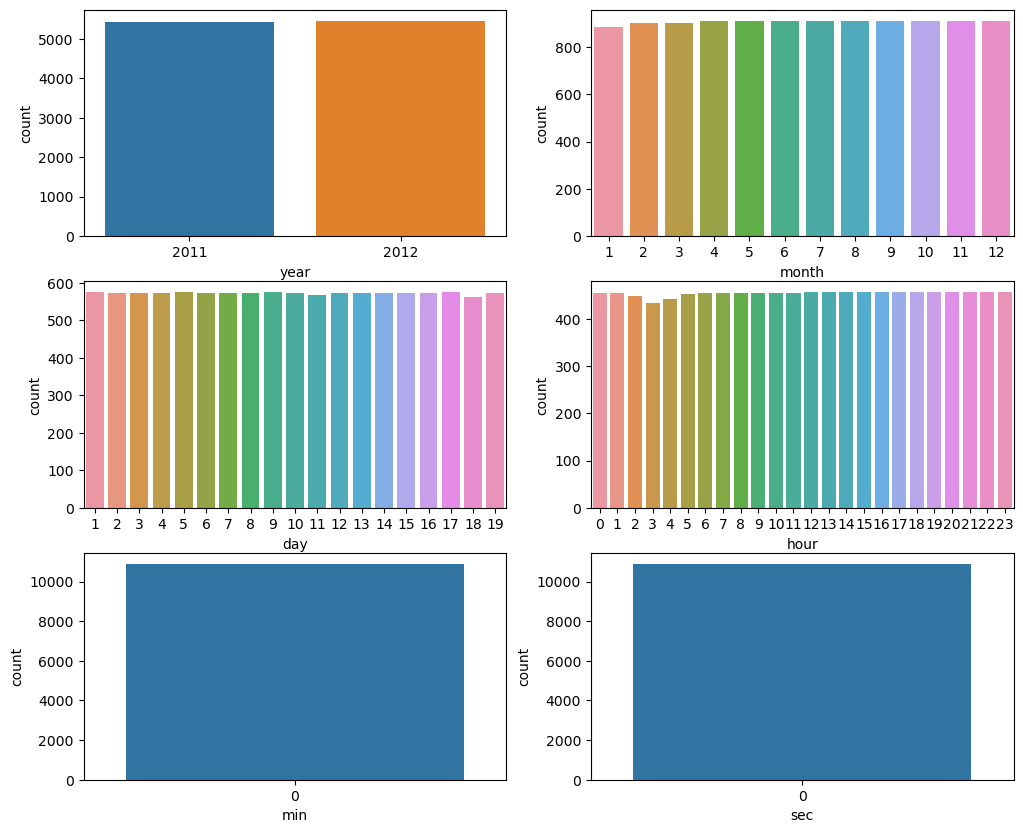

In [391]:
plt.figure(figsize = (12,10))

plt.subplot(3,2,1)
sns.countplot(data = train, x = 'year')
plt.subplot(3,2,2)
sns.countplot(data = train, x = 'month')
plt.subplot(3,2,3)
sns.countplot(data = train, x = 'day')
plt.subplot(3,2,4)
sns.countplot(data = train, x = 'hour')
plt.subplot(3,2,5)
sns.countplot(data = train, x = 'min')
plt.subplot(3,2,6)
sns.countplot(data = train, x = 'sec')

plt.show()

- min, sec값은 존재하지 않음
- day는 19일 까지 밖에 없는 것으로 보이나 이는 data description에서 train set을 이렇게 설정해 놓은 것에 기인함
- date description: the training set is comprised of the first 19 days of each month


## X, y 컬럼 선택 및 train/test 데이터 분리

- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [392]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'min', 'sec'],
      dtype='object')

In [393]:
X_cols = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed','year', 'month', 'day', 'hour']
y_col = 'count'

In [394]:
X = train[X_cols]
y = train[y_col]
print(X.shape, y.shape)

(10886, 11) (10886,)


In [395]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LinearRegression 모델 학습

In [396]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [397]:
linear_regression.fit(X_train, y_train)

LinearRegression()

## 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기


In [400]:
from sklearn.metrics import mean_squared_error

In [401]:
y_pred = linear_regression.predict(X_test)
y_pred

array([239.50937953,  45.97499599, 207.43068266, ..., 305.49147838,
        39.42697714, 241.89089248])

In [402]:
# 계산식 참고: https://growingsaja.tistory.com/233
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print('MSE:', MSE, ', RMSE:',RMSE)

MSE: 19962.939395049976 , RMSE: 141.29026645544263


## x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [403]:
X_test['y_test'] = y_test
X_test['y_pred'] = y_pred
X_test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,y_test,y_pred
3133,3,0,1,1,33.62,59,0.0000,2011,7,19,11,127,239.509380
5786,1,1,0,1,4.10,54,6.0032,2012,1,16,6,13,45.974996
5224,4,0,0,1,9.84,48,12.9980,2011,12,11,18,163,207.430683
8953,3,0,1,2,29.52,62,12.9980,2012,8,15,10,233,289.785397
8054,2,0,1,1,25.42,53,16.9979,2012,6,15,23,222,378.499897


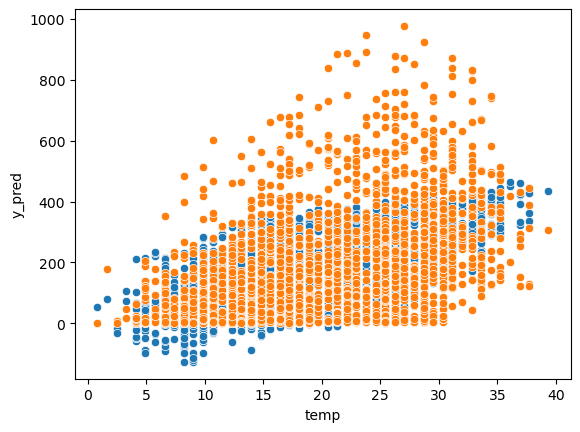

In [404]:
sns.scatterplot(data = X_test, x = 'temp', y = 'y_pred')
sns.scatterplot(data = X_test, x = 'temp', y = 'y_test')
plt.show()

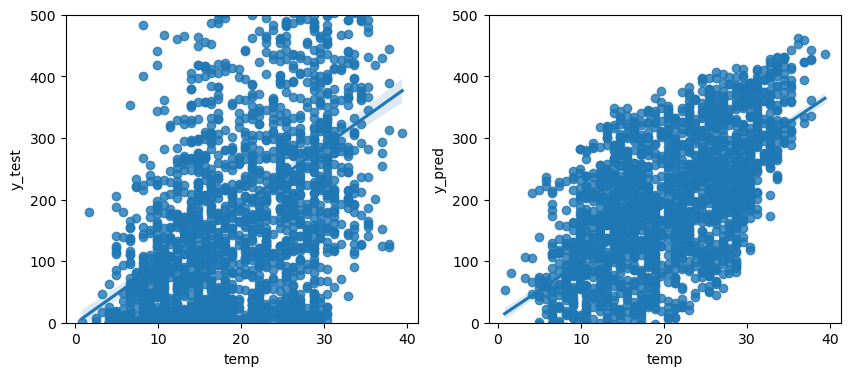

In [405]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.regplot(ax=axes[0], data = X_test, x = 'temp', y = 'y_test')
axes[0].set_ylim(0,500)
sns.regplot(ax=axes[1], data = X_test, x = 'temp', y = 'y_pred')
axes[1].set_ylim(0,500)
plt.show()

- y_pred와 y_test의 scatterplot을 활용하여 분포를 살펴보고 그에 따른 회귀선을 확인해본 결과 두 결과값이 상당한 유사성을 보인다는 것을 확인해 볼 수 있었음